In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
plt.style.use('seaborn-poster')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
data = sio.loadmat('officetemp.mat')

In [3]:
type(data)

dict

In [4]:
temp = np.array([x[0] for x in data['temp']])

In [5]:
type(temp)

numpy.ndarray

In [6]:
temp

array([75, 74, 74, ..., 75, 75, 75], dtype=uint8)

In [7]:
tempC = (temp - 32.)*5./9.

In [8]:
temp_norm = tempC - np.mean(tempC)

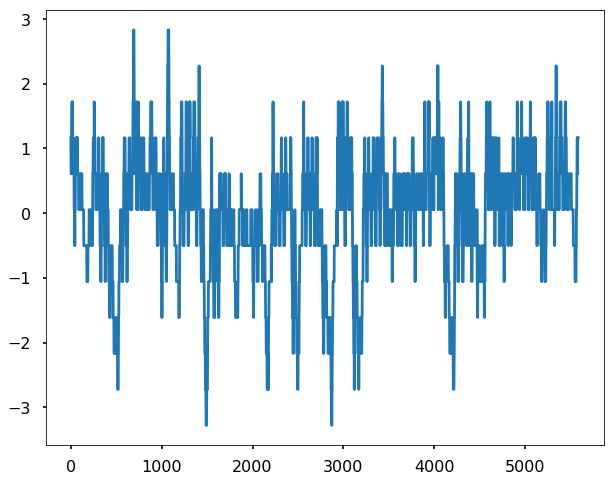

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(temp_norm);

In [10]:
fs = 2*24

In [11]:
t = arange(len(temp))/float(fs)+1

In [12]:
t

array([  1.        ,   1.02083333,   1.04166667, ..., 117.27083333,
       117.29166667, 117.3125    ])

In [13]:
t.size

5584

Text(0, 0.5, 'Temperature (degree)')

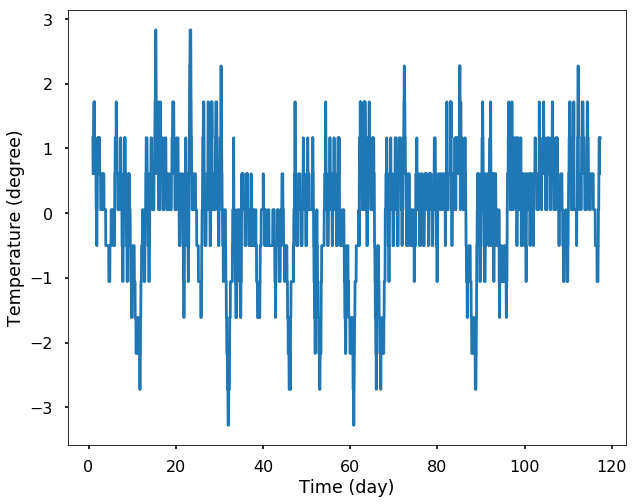

In [14]:
# let's plot the data
plt.figure(figsize = (10, 8))
plt.plot(t, temp_norm)
plt.xlabel('Time (day)')
plt.ylabel('Temperature (degree)')

In [15]:
#Zero crossings
from matplotlib.mlab import find
def freq_zero_crossing(sig, fs):
    """
    Frequency estimation from zero crossing method
    sig - input signal
    fs - sampling rate
    
    return: 
    dominant period
    """
    # Find the indices where there's a crossing
    indices = find((sig[1:] >= 0) & (sig[:-1] < 0))

    # Let's calculate the real crossings by interpolate
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]
    
    # Let's get the time between each crossing
    # the diff function will get how many samples between each crossing
    # we divide the sampling rate to get the time between them
    delta_t = np.diff(crossings) / fs
    
    # Get the mean value for the period
    period = np.mean(delta_t)
    
    return period

In [16]:
period_from_zero_crossing = freq_zero_crossing(temp_norm,fs)

C:\Users\obinna.izima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  del sys.path[0]


In [17]:
print('The period estimation is %.1f days'%(period_from_zero_crossing))

The period estimation is 1.4 days


In [18]:
period_from_zero_crossing

1.4194958847736625

In [19]:
f, Pxx = signal.periodogram(temp_norm,fs=fs,window='hanning',scaling='spectrum')

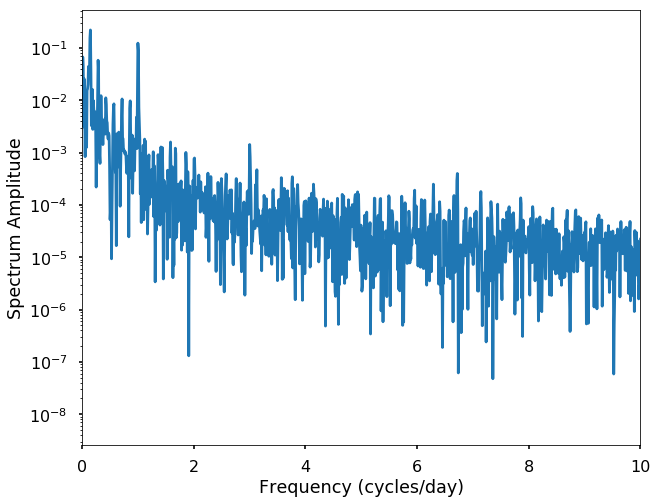

In [20]:
plt.figure(figsize=(10,8))
plt.plot(f,Pxx)
plt.xlim(0,10)
plt.yscale('log')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Spectrum Amplitude');

In [21]:
for amp_arg in np.argsort(np.abs(Pxx))[::-1][1:6]:
    day = 1 / f[amp_arg]
    print(day)

7.270833333333333
1.0028735632183907
0.9943019943019943
116.33333333333333
3.5252525252525255


In [22]:
#Autocorrelation
from statsmodels import api as sm

In [23]:
acf = sm.tsa.acf(temp_norm,nlags=len(temp_norm))

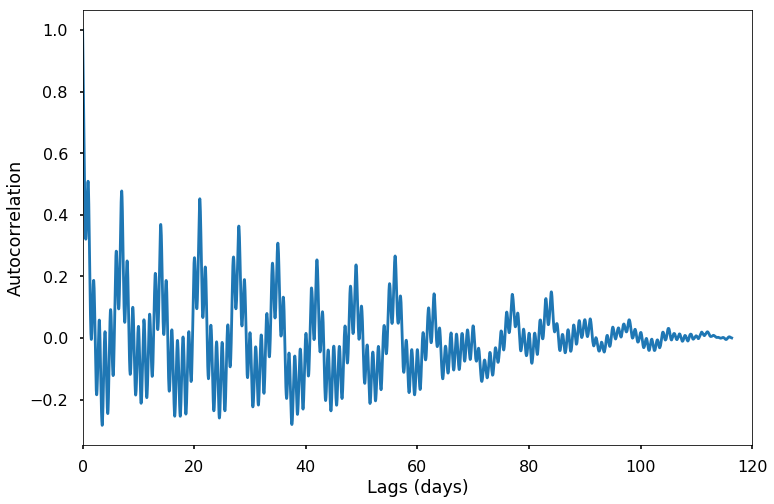

In [24]:
plt.figure(figsize=(12,8))
lag = arange(len(temp_norm)) /2. /24.
plt.plot(lag,acf)
plt.xlim(0,120)
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation');

In [25]:
len(temp_norm)/2/24

116.33333333333333

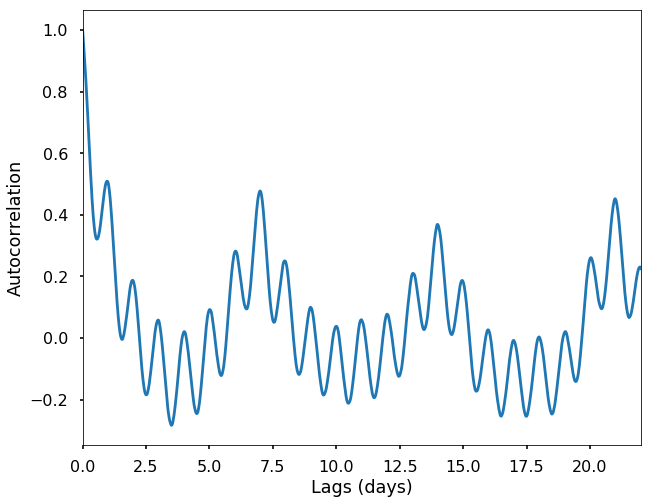

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(lag, acf)
plt.xlim((0, 22))
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation');

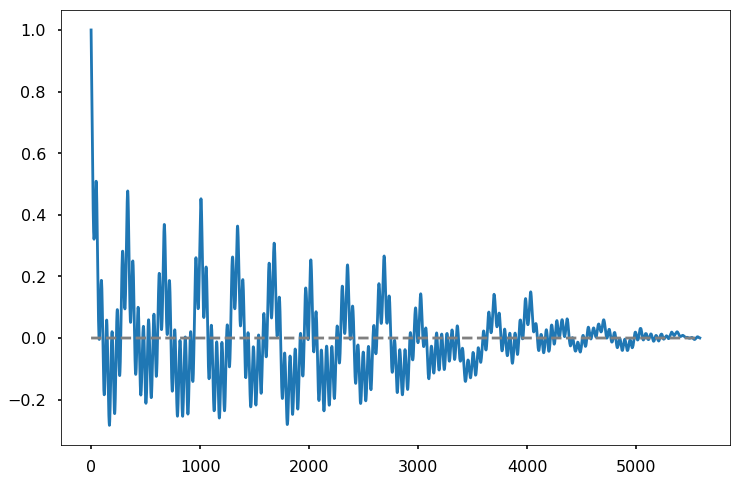

In [27]:
from scipy.signal import find_peaks
plt.figure(figsize=(12,8))
peaks, _ = find_peaks(acf, height=0)
plt.plot(acf)

plt.plot(peaks, acf[peaks], "x")
plt.plot(np.zeros_like(acf), "--", color="gray")
plt.show();

In [ ]:
plt.plot(acf)
plt.plot(a, acf[a],"x")

In [36]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

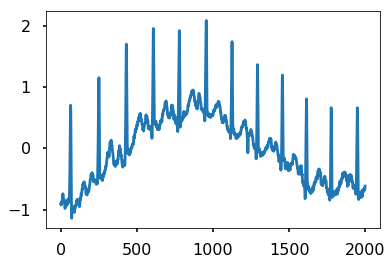

In [37]:

x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
#plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")


In [38]:
# get the autocorrelation coefficient
acorr = sm.tsa.acf(temp_norm, nlags=len(temp_norm))

Text(0, 0.5, 'Autocorrelation')

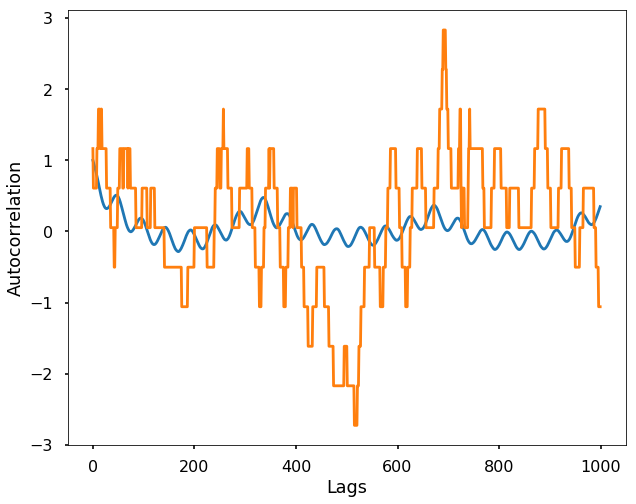

In [53]:
plt.figure(figsize = (10, 8))
lag = np.arange(len(temp_norm))
plt.plot(lag[:1000], acorr[:1000])
plt.plot(temp_norm[:1000])
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')